In [ ]:
# HYPOTHESIS TESTING

In [ ]:
# Hypothesis 4:
# Teams of collaborating authors consist of an equal amount of men and women.

#Hypothesis 5:
# Bigger teams are more diverse.

In [1]:
# >>> Preparation
import pandas

print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown'
]

publs = pandas.read_csv("data/publications_cor3.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [2]:
# get only those publications created by teams
team_publs = publs[publs['n_authors'] > 1]

In [3]:
# >>> Testing
# H4

# Finding the mode of a series: https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
from statistics import mode

# Relative values
# Publications Contributed to
# Finding the mode of a series: https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
print("Calculating the mode...")

mode_all = mode(team_publs["ratio"])

not_all_unknown = team_publs[team_publs["n_unknown"] != team_publs["n_authors"]]
mode_not_all_unknown = mode(not_all_unknown["ratio"])

print("The mode for all is {}.".format(mode_all))
print("The mode for those where at least one author could be classified is {}.".format(mode_not_all_unknown))

Calculating the mode...
The mode for all is 50.0.
The mode for those where at least one author could be classified is 50.0.


In [ ]:
diff = not_all_unknown["n_contribs_males"] - not_all_unknown["n_contribs_females"]

In [ ]:
diff = diff.values

In [ ]:
len(diff)

In [ ]:
from scipy.stats import wilcoxon
wilcoxon(diff) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['font.size'] = 11.0

print("Visualizing Gender Inequality Index Histogram...")
not_all_unknown["ratio"].hist(color="grey", bins=20)
plt.xlabel("Gender Inequality Index")
plt.ylabel("Amount of publications")

plt.savefig('graphs/h4/gender_inequality_index_hist_not_all_unknown.pdf')
plt.savefig('graphs/h4/gender_inequality_index_hist_not_all_unknown.pgf')

In [ ]:
# >>> Evaluation
# Hypothesis 4 is not correct. 

In [ ]:
# >>> Testing
# H5 Bigger teams are more diverse.

In [4]:
abs_team_publs = team_publs
abs_team_publs["ratio"] = abs(abs_team_publs["ratio"])

C:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
len(abs_team_publs)

3689046

In [9]:
from scipy import stats
print("Calculating Spearman's Correlation Coefficient...")
small_teams_cor_l = stats.spearmanr(abs_team_publs["ratio"], abs_team_publs["n_authors"])
print(small_teams_cor_l)
print("Done!")

Calculating Spearman's Correlation Coefficient...
SpearmanrResult(correlation=-0.0034386975837674503, pvalue=3.9836158122940604e-11)
Done!


In [6]:
print("Calculating distribution statistics: mean, std, median - per team size...")
team_publs_by_n_authors = team_publs.groupby("n_authors")

team_ratio_mean = team_publs_by_n_authors.agg({'ratio':'mean'})
team_ratio_mean["n_authors"] = team_ratio_mean.index.values.tolist()

team_ratio_std = team_publs_by_n_authors.agg({'ratio':'std'})
team_ratio_std["n_authors"] = team_ratio_std.index.values.tolist()

team_ratio_median = team_publs_by_n_authors.agg({'ratio':'median'})
team_ratio_median["n_authors"] = team_ratio_median.index.values.tolist()
print("Done!")

Calculating distribution statistics: mean, std, median - per team size...
Done!


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['font.size'] = 11.0

In [ ]:
# >>> Visualization
print("Visualizing distribution statistics per team size as well as individual gender inequality ratio values.")
plt.plot(team_ratio_mean["n_authors"], team_ratio_mean["ratio"], label="Mean", color="black")
plt.plot(team_ratio_std["n_authors"], team_ratio_std["ratio"], label="Standard Deviation", color="grey", linestyle=":")
plt.plot(team_ratio_median["n_authors"], team_ratio_median["ratio"], label="Median", color="grey")
plt.title("Are bigger teams more diverse?")
plt.xlabel("Team Size")
plt.ylabel("Gender Balance Indicator")
# Anchor a legend outside the plot: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(bbox_to_anchor=(1.5, 1))

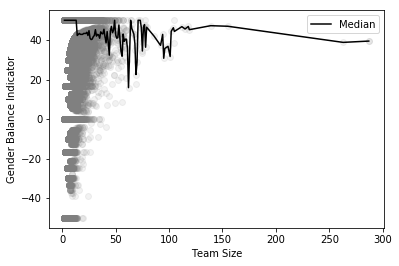

In [8]:
plt.scatter(team_publs["n_authors"], team_publs["ratio"], color="grey", alpha=0.1, label="")
plt.plot(team_ratio_median["n_authors"], team_ratio_median["ratio"], label="Median", color="black")

plt.xlabel("Team Size")
plt.ylabel("Gender Balance Indicator")
plt.legend()

plt.savefig('graphs/h5/ratio_by_team_size_scatter.pdf')
plt.savefig('graphs/h5/ratio_by_team_size_scatter.pgf')

plt.show()

In [ ]:
# >>> Interpretation:
# Hypothesis 5 is not correct.